<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana12/MatrizCovarianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI2025/Semana10')
!ls

Data				   MinimosGradiente.ipynb
EvolutivoLinearSystem.ipynb	   MinimosGradienteLevenberg–Marquardt.ipynb
Lagrange_Points.ipynb		   NewtonRaphson.ipynb
MinimosCuadradosMatriciales.ipynb


In [4]:
data = np.loadtxt('Data/MinimosLineal.txt')
x_data, y_data = data[:, 0], data[:, 1]

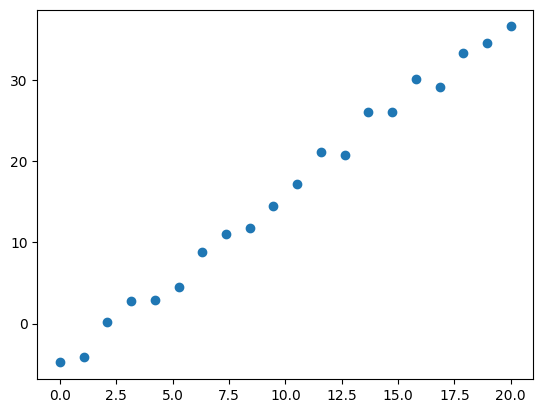

In [5]:
plt.scatter(x_data, y_data)

In [6]:
def GetFit(x,y,n=1):

  l = x.shape[0]
  b = y

  A = np.ones((l,n+1))
  for i in range(1,n+1):
    A[:,i] = x**i

  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  xsol = np.linalg.solve(AT,bT)

  return xsol

In [31]:
n=5
params = GetFit(x_data, y_data, n=n)

In [32]:
def GetModel(x,p):

  y = 0
  for n in range(len(p)):
    y += p[n]*x**n

  return y

In [33]:
_x = np.linspace(min(x_data),max(x_data),100)
_y = GetModel(_x, GetFit(x_data, y_data, n=n))

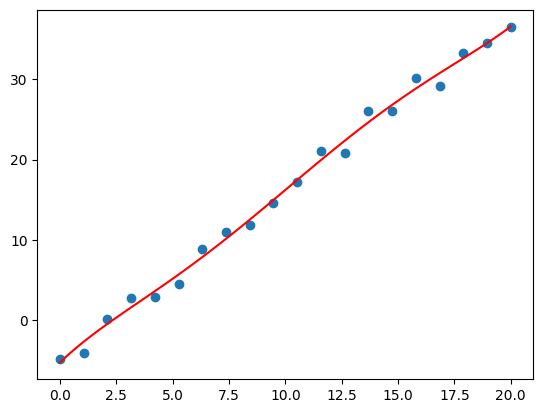

In [34]:
plt.scatter(x_data, y_data)
plt.plot(_x,_y,color='r')

In [35]:
# Matriz de covarianza
def GetError(x,y,p):

  l = x.shape[0]

  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  #print(A)

  # Vamos a calcular los residuales
  R = y - np.dot(A,p)

  # Vamos a calcular la desviacion tipica
  sigma2 = np.dot(R.T,R)/(len(x)-len(p))

  #print(sigma2)

  # Matriz de covarianza
  Cvar = sigma2*np.linalg.inv(np.dot(A.T,A))

  return Cvar

In [36]:
CovMatrix = GetError(x_data,y_data,params)
CovMatrix

array([[ 1.17090911e+00, -9.61879847e-01,  2.46071613e-01,
        -2.67916540e-02,  1.30209540e-03, -2.32596517e-05],
       [-9.61879847e-01,  1.42461009e+00, -4.51151035e-01,
         5.49842775e-02, -2.86624905e-03,  5.37079343e-05],
       [ 2.46071613e-01, -4.51151035e-01,  1.55912584e-01,
        -1.99989316e-02,  1.07859081e-03, -2.07088535e-05],
       [-2.67916540e-02,  5.49842775e-02, -1.99989316e-02,
         2.65033657e-03, -1.46271623e-04,  2.85722144e-06],
       [ 1.30209540e-03, -2.86624905e-03,  1.07859081e-03,
        -1.46271623e-04,  8.21123750e-06, -1.62519475e-07],
       [-2.32596517e-05,  5.37079343e-05, -2.07088535e-05,
         2.85722144e-06, -1.62519475e-07,  3.25038952e-09]])

In [37]:
np.round(params,4)

array([-5.2754e+00,  2.6860e+00, -2.6540e-01,  3.9100e-02, -2.2000e-03,
        0.0000e+00])

In [38]:
# Desviacion standard
std = np.sqrt(np.diag(CovMatrix))
std

array([1.08208554e+00, 1.19357031e+00, 3.94857676e-01, 5.14814196e-02,
       2.86552569e-03, 5.70121874e-05])

In [39]:
labels = [f"$\\beta_{{{i+1}}}$" for i in range(len(params))]

In [40]:
cov_matrix = pd.DataFrame(CovMatrix,index=labels,columns=labels)
cov_matrix

,$\beta_{1}$,$\beta_{2}$,$\beta_{3}$,$\beta_{4}$,$\beta_{5}$,$\beta_{6}$
$\beta_{1}$,1.170909,-0.961880,0.246072,-0.026792,1.302095e-03,-2.325965e-05
$\beta_{2}$,-0.961880,1.424610,-0.451151,0.054984,-2.866249e-03,5.370793e-05
$\beta_{3}$,0.246072,-0.451151,0.155913,-0.019999,1.078591e-03,-2.070885e-05
$\beta_{4}$,-0.026792,0.054984,-0.019999,0.002650,-1.462716e-04,2.857221e-06
$\beta_{5}$,0.001302,-0.002866,0.001079,-0.000146,8.211238e-06,-1.625195e-07
$\beta_{6}$,-0.000023,0.000054,-0.000021,0.000003,-1.625195e-07,3.250390e-09


from matplotlib import pyplot as plt
cov_matrix['$\\beta_{1}$'].plot(kind='hist', bins=20, title='$\\beta_{1}$')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cov_matrix['$\\beta_{2}$'].plot(kind='hist', bins=20, title='$\\beta_{2}$')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cov_matrix['$\\beta_{3}$'].plot(kind='hist', bins=20, title='$\\beta_{3}$')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cov_matrix['$\\beta_{4}$'].plot(kind='hist', bins=20, title='$\\beta_{4}$')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cov_matrix.plot(kind='scatter', x='$\\beta_{1}$', y='$\\beta_{2}$', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cov_matrix.plot(kind='scatter', x='$\\beta_{2}$', y='$\\beta_{3}$', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cov_matrix.plot(kind='scatter', x='$\\beta_{3}$', y='$\\beta_{4}$', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cov_matrix.plot(kind='scatter', x='$\\beta_{4}$', y='$\\beta_{5}$', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cov_matrix['$\\beta_{1}$'].plot(kind='line', figsize=(8, 4), title='$\\beta_{1}$')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cov_matrix['$\\beta_{2}$'].plot(kind='line', figsize=(8, 4), title='$\\beta_{2}$')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cov_matrix['$\\beta_{3}$'].plot(kind='line', figsize=(8, 4), title='$\\beta_{3}$')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cov_matrix['$\\beta_{4}$'].plot(kind='line', figsize=(8, 4), title='$\\beta_{4}$')
plt.gca().spines[['top', 'right']].set_visible(False)

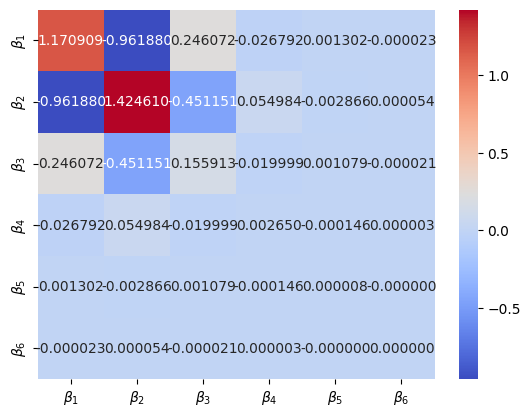

In [41]:
sns.heatmap(cov_matrix,annot=True, fmt=".6f", cmap='coolwarm',
           xticklabels=cov_matrix.columns, yticklabels=cov_matrix.index)

plt.show()